# How Popular Music Has Evolved Through the Years (All Time Top 2000 Spotify Dataset)
## 1. Project Introduction
Popular music is forever evolving, whether it be due to cultural change or the improvement/invention of new instruments and technology. This project sets out to discover and document the development of popular music over time.

The main objectives of this project are as follows:

1. To find the most popular artists, overall and by decade.
2. To observe how the style of popular music has changed (by genre and musical characteristics).
3. Bonus: To compare how the style of music differs between the most popular artists and the rest.

A few measures of popularity will be discussed to determine which is most fitting for this investigation. Then the project will be analysing the 'All Time Top 2000 Spotify Dataset' to discover historical trends in popular music.


### The Dataset
The data was taken from a dataset found on Kaggle (https://www.kaggle.com/datasets/iamsumat/spotify-top-2000s-mega-dataset). It contains 'audio statistics of the top 2000 tracks on Spotify' and the songs release years range from 1956-2019, totaling 7 decades.

There are 15 column which include basic infomation about the song such as:

Index: ID <br>
Title: Name of the Track <br>
Artist: Name of the Artist <br>
Genre: Genre of the track <br>
Year: Release Year of the track <br>

As well as details about the song's style and characteristics:

Beats per Minute (BPM): The tempo of the song <br>
Length (Duration): The duration of the song in seconds <br>
Energy: The **higher** the value, the **more energtic** song <br>
Danceability: The **higher** the value, the easier it is to dance to this song <br>
Loudness (dB): The **higher** the value, the **louder** the song <br>
Liveness: The **higher** the value, the **more live** sounding the song <br>
Valence: The **higher** the value, the **more positive mood** for the song <br>
Acoustic: The **higher** the value the **more acoustic** the song is <br>
Speechiness: The **higher** the value the **more spoken words** the song contains <br>
Popularity: The **higher** the value the **more popular** the song is <br>

These columns use Spotify API to extract the audio features from the tracks. 

A sample of the raw dataset can be viewed below.

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from re import search

#Reading csv file into Jupyter Notebook

spotify = pd.read_csv('spotify-2000.csv')
spotify.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1753,Around the World,Daft Punk,electro,1997,121,80,96,-5,9,84,430,0,15,70
1,1478,Kingston Town,UB40,reggae fusion,1989,102,25,96,-13,4,80,228,16,6,49
2,193,The Real Slim Shady,Eminem,detroit hip hop,2000,105,66,95,-4,5,76,284,3,6,80
3,283,Watskeburt?!,De Jeugd Van Tegenwoordig,dutch hip hop,2008,130,49,95,-8,23,59,376,1,23,55
4,1157,Another One Bites The Dust - Remastered 2011,Queen,glam rock,1980,110,53,93,-6,16,76,215,11,16,74


### Data Tidying and Formatting
As datasets go, this one is already pretty tidy, so only a few alterations had to be made.<br>

In [2]:
#Cleaning and formating dataframe, adding useful columns and changing datatypes

spotify = spotify.set_axis(['index', 'title', 'artist', 'genre', 'year', 'bpm',
                            'energy', 'danceability', 'loudness_db', 'liveness', 'valence',
                            'duration', 'acousticness', 'speechiness', 'popularity'], axis=1, inplace=False)

spotify.duration = spotify.duration.str.replace(',', '')
spotify.duration = spotify.duration.astype(np.int64)

spotify['year_str'] = spotify.year.astype(str)

In [3]:
#Adding a new 'decade' column (string) to the dataframe & sorting dataframe by year ascending

year_list = spotify['year_str'].tolist()

decade_list = []
for year in year_list:
    if '195' in year:
        decade_list += ['50']
    elif '196' in year:
        decade_list += ['60']
    elif '197' in year:
        decade_list += ['70']
    elif '198' in year:
        decade_list += ['80']
    elif '199' in year:
        decade_list += ['90']
    elif '200' in year:
        decade_list += ['00']
    elif '201' in year:
        decade_list += ['10']
        
spotify['decade'] = decade_list

spotify = spotify.sort_values('year')

In [4]:
#Adding a new 'decade_int' column (integer) to the dataframe, setting the value to equal the midpoint year in the decade

decade_list = spotify['decade'].tolist()

int_list = []
for year in decade_list:
    if '50' in year:
        int_list.append(1955)
    elif '60' in year:
        int_list.append(1965)
    elif '70' in year:
        int_list.append(1975)
    elif '80' in year:
        int_list.append(1985)
    elif '90' in year:
        int_list.append(1995)
    elif year == '00':
        int_list.append(2005)
    elif '10' in year:
        int_list.append(2015)
        
spotify['decade_int'] = int_list

Firstly, the column names were simplified to a more coding-friendly format

Secondly, when the duration surpasses 1000 minutes, a ',' is added to the value. The comma was removed and the data type was converted back into a integer.

Lastly, a few new columns were added:
1. **'year_str'** - year column as a string. This may come in handy later when expressing the year as a categorical value instead of numerical.
2. **'decade'** - places each song into the decade they were in.
3. **'decade_int'** - decade column in integer form .

The final dataset is printed below along with each columns datatypes.

The dataset contains 0 Null values.

In [5]:
#Displaying the tidied dataframe and final datatypes

display(spotify.head())
display(spotify.dtypes)

null_value_count = spotify.isna().sum().sum()
print(f'There are {null_value_count} null values in the Spotify Dataframe')

,index,title,artist,genre,year,bpm,energy,danceability,loudness_db,liveness,valence,duration,acousticness,speechiness,popularity,year_str,decade,decade_int
841,1986,Blue Suede Shoes,Elvis Presley,adult standards,1956,95,66,56,-8,14,96,119,65,6,62,1956,50,1955
441,1987,Jailhouse Rock,Elvis Presley,adult standards,1958,167,58,65,-10,7,92,146,41,8,73,1958,50,1955
271,1990,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21,70,-12,11,72,128,84,7,63,1958,50,1955
1686,1991,Hound Dog,Elvis Presley,adult standards,1958,175,76,36,-8,76,95,136,73,6,69,1958,50,1955
1971,1989,Summertime,Louis Armstrong,adult standards,1958,168,7,17,-21,14,10,298,92,3,66,1958,50,1955


index            int64
title           object
artist          object
genre           object
year             int64
bpm              int64
energy           int64
danceability     int64
loudness_db      int64
liveness         int64
valence          int64
duration         int64
acousticness     int64
speechiness      int64
popularity       int64
year_str        object
decade          object
decade_int       int64
dtype: object

There are 0 null values in the Spotify Dataframe


### Observing the Distribution of Datapoints
Next, I decided to view the distribution of datapoints for each year to find out if there was sufficient data to give an accurate analysis.

A histogram was plotted which portrays the number of songs per year. In addition, the number of datapoints per decade was calculated and printed.

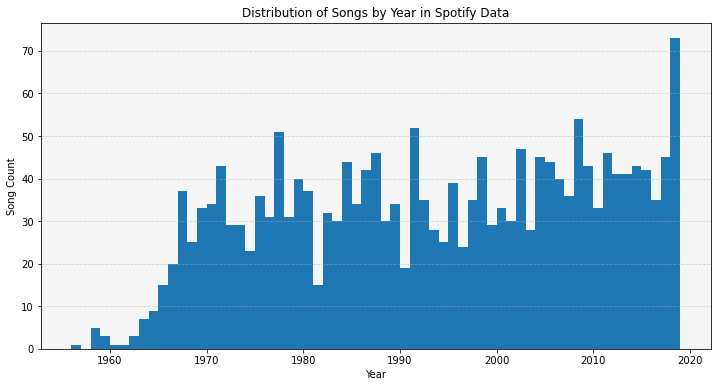

There are 9 datapoints in the 50s
There are 151 datapoints in the 60s
There are 347 datapoints in the 70s
There are 344 datapoints in the 80s
There are 331 datapoints in the 90s
There are 400 datapoints in the 00s
There are 399 datapoints in the 10s


<Figure size 432x288 with 0 Axes>

In [6]:
#Plot histogram of song years

year_range = max(spotify.year) - min(spotify.year)

plt.figure(figsize=(12,6))
ax = plt.subplot()
ax.set_facecolor('whitesmoke')
plt.hist(spotify.year, bins=year_range)
plt.xlabel('Year')
plt.ylabel('Song Count')
plt.title('Distribution of Songs by Year in Spotify Data')
ax.grid(zorder=0, linestyle='dashed', axis='y', alpha=0.5)
plt.show()
plt.clf()


#Count and print number of data points in each decade

def datapoints_in_decade(decades):
    for decade in decades:
        songs = len(spotify[spotify['decade'] == decade])
        print(f'There are {songs} datapoints in the {decade}s')

decades = ['50', '60', '70', '80', '90', '00', '10']

datapoints_in_decade(decades)

As displayed in the histogram, there are an insuffient number of datapoints in the 1950s decade (9 datapoints in total). The data also only ranges from 1955-1959. For these reasons, I will omit this data from the following investigations as the data will not give an accurate represenation of the decade as a whole.

The 1960s decade also has few datapoints, but I believe that there are enough to be able to include in the investigation. However, there are much fewer points at the start of the decade so this needs to be assessed when discussing the results later.

All other decades have a good sample size and spread of data.

In [7]:
#Removing the 50s decade from the dataset

spotify = spotify[spotify['decade_int'] > 1955]

## 2. Project Analysis & Discussion
### OBJECTIVE 1
To find the most popular artists, overall and by decade.
### Defining 'Popularity'
This dataset has provide a Popularity column which would be the easiest way to determine the popularity of each song. However, after a quick skim of the data, I noticed many of the songs with a high popularity rating were songs released in the 2010s. Spotify have potentially ranked the popularity by number of recent listens on their website which would create a strong bias towards more modern music. Although these songs may be the most popular currently, this project is more focused on the changing trends of popular music over the last six decades.

I decided to plot a histogram of the top 200 (10%) ranked songs to observe the distribution.

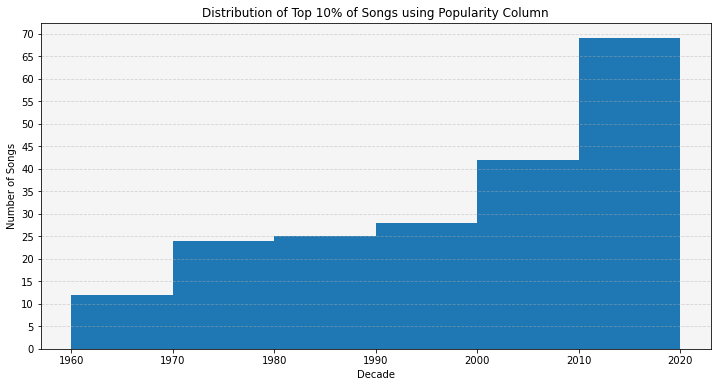

<Figure size 432x288 with 0 Axes>

In [8]:
# Find top 10% of songs
spotify = spotify.sort_values('popularity')
spotify_popularity = spotify[-200:].groupby('decade_int')['decade'].count()

# Plot histogram of distribution of top 10% of songs
plt.figure(figsize=(12,6))
ax = plt.subplot()
plt.bar(spotify_popularity.index, spotify_popularity, width=10)
plt.title('Distribution of Top 10% of Songs using Popularity Column')
plt.ylabel('Number of Songs')
plt.xlabel('Decade')
ax.set_yticks(range(0,75,5))
ax.grid(zorder=0, linestyle='dashed', axis='y', alpha=0.5)
ax.set_facecolor('whitesmoke')
plt.show()
plt.clf()

As expected the data is heavily skewed to the left. A staggering 70 (35%) songs were released in the 2010s, compared with only 13 (6.5%) in the 1960s. Unfortunately, the Popularity variable will be an unappropriate measure for this investigation.

Another option, I could define popularity as 'the number of hit songs in the top 2000'. There are a good spread of results present for each decade. On the other hand, this may favour older artists who have been active longer, yet this will provide a good opportunity to analyse the evolution of music and which musical styles have longevity over several decades.

### Top 10 Artists (1960-2019)
The Top 10 Artists overall were defined as the artists with the highest number of popular songs in the Spotify dataset.

The artists are displayed in the bar chart below.

<class 'pandas.core.series.Series'>


C:\Users\Sam\AppData\Local\Temp\ipykernel_1248\4088442351.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels = top10_artists, rotation = 90)


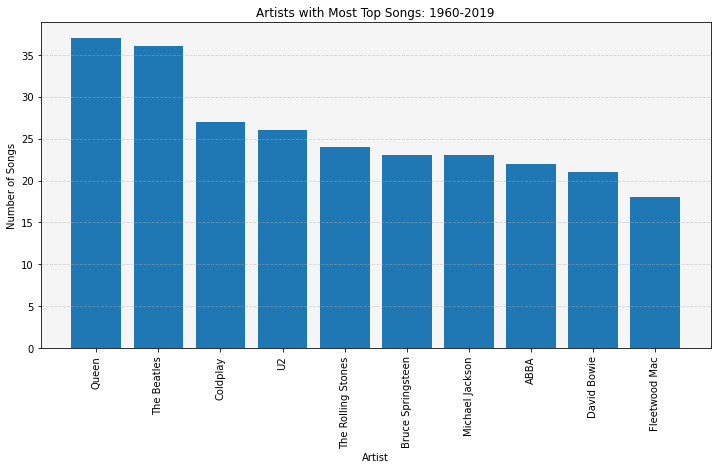

<Figure size 432x288 with 0 Axes>

In [9]:
spotify = spotify.sort_values('year')

# Creating a series of the top 10 artists and their number of hit songs
spotify_top = spotify.groupby('artist').size()
spotify_top = spotify_top.sort_values(ascending = False)
spotify_top = spotify_top[:10]
print(type(spotify_top))

top10_artists = ['Queen', 'The Beatles', 'Coldplay', 'U2', 'The Rolling Stones',
       'Bruce Springsteen', 'Michael Jackson', 'ABBA', 'David Bowie',
       'Fleetwood Mac']

# Plotting a bar chart comparing the top 10 artists
plt.figure(figsize=(12,6))
ax = plt.subplot()
plt.bar(spotify_top.index, spotify_top)
plt.title('Artists with Most Top Songs: 1960-2019')
plt.ylabel('Number of Songs')
plt.xlabel('Artist')
ax.set_xticklabels(labels = top10_artists, rotation = 90)
ax.set_yticks(range(0,40,5))
ax.grid(zorder=0, linestyle='dashed', axis='y', alpha=0.5)
ax.set_facecolor('whitesmoke')
plt.show()
plt.clf()


As seen in the results, the classic older artists *Queen* and *The Beatles* topped the graph with **37** and **36** hit songs respectively. In third with **27** songs is *Coldplay*, a relatively more recent artist.

This begs the question, do *Queen* have the most hit songs because they have been around for longer?

To answer this question, I decided to dive deeper into the data and improve the bar chart so it would display in which decade each hit song was release.

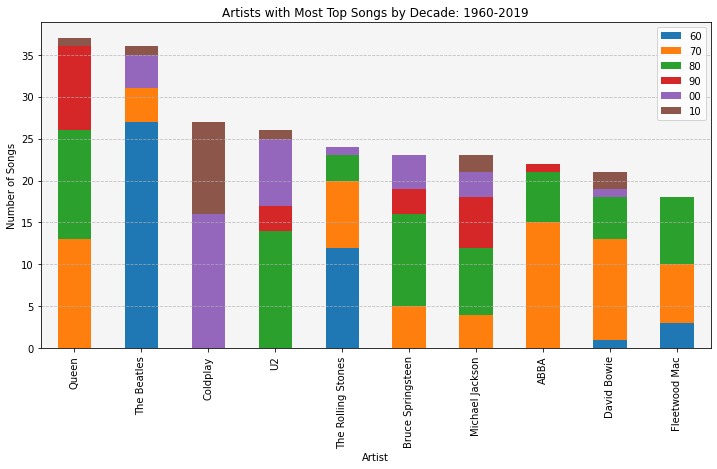

<Figure size 432x288 with 0 Axes>

In [10]:
# Concatenating a subset which only includes data from the top 10 artists
a = spotify[spotify.artist == 'Queen']
b = spotify[spotify.artist == 'The Beatles']
c = spotify[spotify.artist == 'Coldplay']
d = spotify[spotify.artist == 'The Rolling Stones']
e = spotify[spotify.artist == 'Bruce Springsteen']
f = spotify[spotify.artist == 'Michael Jackson']
g = spotify[spotify.artist == 'ABBA']
h= spotify[spotify.artist == 'U2']
i = spotify[spotify.artist == 'David Bowie']
j = spotify[spotify.artist == 'Fleetwood Mac']

top10_df = pd.concat([a,b,c,d,e,f,g,h,i,j],ignore_index=True)


# Function which produces dataframe of the top 10 artists' song count per decade
def song_count_by_decade_df(df, decades):
    
    #creates new dataframe where the first column is a list of the top 10 artists
    top10_artists = ['Queen', 'The Beatles', 'Coldplay', 'U2', 'The Rolling Stones', 'Bruce Springsteen',
                     'Michael Jackson', 'ABBA', 'David Bowie', 'Fleetwood Mac']
    dataframe = pd.DataFrame(top10_artists)
    dataframe['artists'] = top10_artists
    
    # creates new column and song count for each decade
    for decade in decades:
        temp_df = df[df.decade == decade]
        song_count = temp_df['artist'].value_counts()
        artists = song_count.index
    
    # Appends the song count for each artist to a list and inserts that list into the specific decade column
        lst = []
        for artist in top10_artists:
            if artist not in artists:
                lst.append(0)
            else:
                lst.append(song_count[artist])
        dataframe[decade] = lst

    return dataframe


# Using the above function to plot a stacked bar chart
decades=['60', '70', '80', '90', '00', '10']
barchart_df = song_count_by_decade_df(top10_df, decades)

barchart_df.plot.bar(x='artists', stacked=True, title='Artists with Most Top Songs by Decade: 1960-2019', figsize=(12,6))
plt.ylabel('Number of Songs')
plt.xlabel('Artist')
ax =plt.subplot()
ax.grid(zorder=0, linestyle='dashed', axis='y', alpha=0.8)
ax.set_facecolor('whitesmoke')
plt.show()
plt.clf()


Now the data shows us that *Queen* have had hit songs in 4 different decades, showing their music is consistanly popular and songs have still been released after the death of lead singer Freddie Mercury.

The same conclusions can be made about *The Beatles* who were extremely popular in the 1960s. This  artist released songs after the band was dissolved in 1970. Perhaps if they continued to make new music they would've topped the list?

On the other hand, *Coldplay*'s hit songs have so far only spanned 2 decades. In a few more decades, it is possible for them to potentially surpass *Queen* as the most popular artists.

Looking further down the graph, we can see both *ABBA* and *Fleetwood Mac* who have not had a hit song since the 1990s and 1980s respectively. This may be due to their style of music no longer being popular, or they have not released any new material since then. Further analysis is needed to answer this.

### Top Artists per Decade
Below are bar charts of the most popular artists per decade

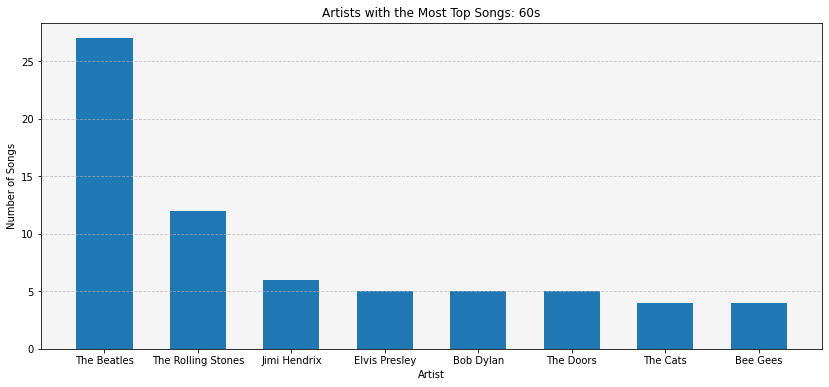

<Figure size 432x288 with 0 Axes>

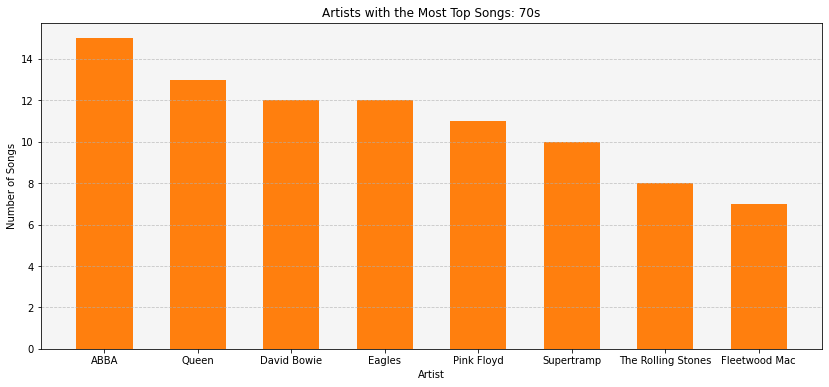

<Figure size 432x288 with 0 Axes>

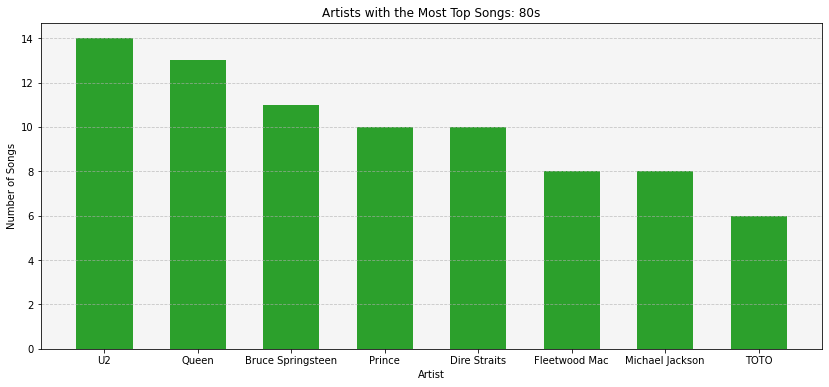

<Figure size 432x288 with 0 Axes>

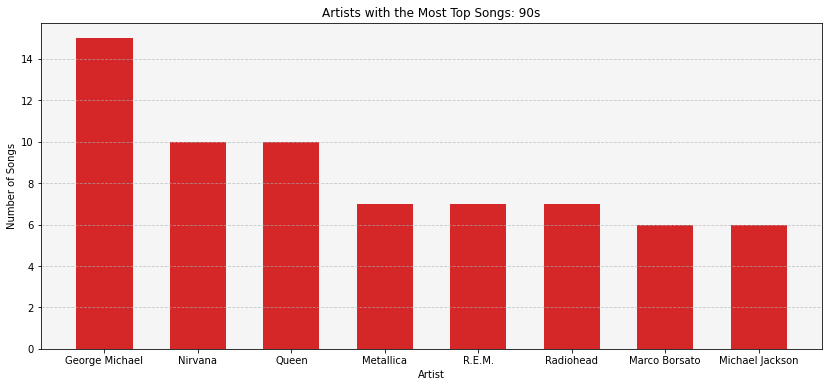

<Figure size 432x288 with 0 Axes>

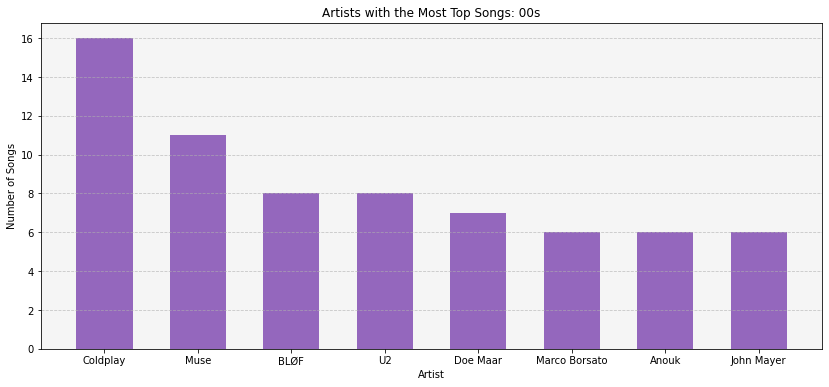

<Figure size 432x288 with 0 Axes>

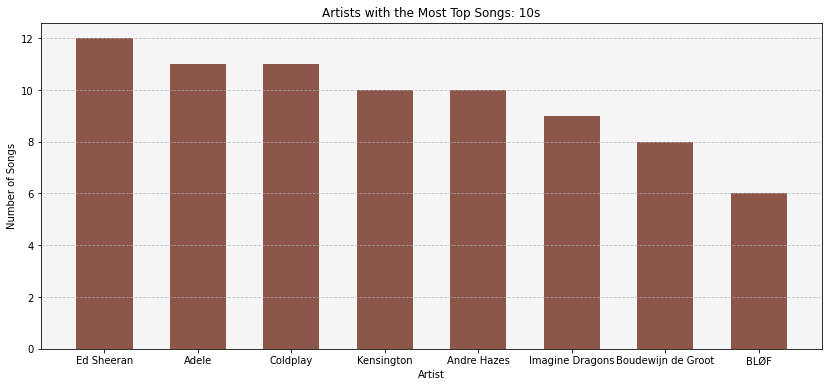

<Figure size 432x288 with 0 Axes>

In [11]:
#Most Frequent Artist By Decade

# Function which creates subset for a decade, finds the top artists and plots a bar chart
def top_song_decade(decade, top, color):
    
    df_dec = spotify[spotify.decade == decade]
    
    artist_dec = df_dec.groupby('artist').size()
    artist_dec = artist_dec.sort_values(ascending = False)
    artist_dec_trim = artist_dec[:top]
    
    plt.figure(figsize=(14,6))
    plt.bar(artist_dec_trim.index, artist_dec_trim, color=color, width = 0.6)
    plt.title(f'Artists with the Most Top Songs: {decade}s')
    plt.ylabel('Number of Songs')
    plt.xlabel('Artist')
    ax = plt.subplot()
    ax.grid(zorder=0, linestyle='dashed', axis='y', alpha=0.7)
    ax.set_facecolor('whitesmoke')
    plt.show()
    plt.clf()

top = 8
top_song_decade('60', top, 'tab:blue')
top_song_decade('70', top, 'tab:orange')
top_song_decade('80', top, 'tab:green')
top_song_decade('90', top, 'tab:red')
top_song_decade('00', top, 'tab:purple')
top_song_decade('10', top, 'tab:brown')

In the 1960s, *The Beatles* are by far the most popular artists with over double the number of hit songs as their closest competetors *The Rolling Stones*. The rest of the top artists are predominantly American with a few exceptions.

In the 1970s, *ABBA* is the most popular artist. This is the only instance of an artist from a non-english speaking country top the list, however, their songs are sung in English. This decade is also the first time we see *Queen* make the top 8.

In the 1980s *Queen* are in the top 8 again, however, their are narrowly beaten to the top spot by *U2*. The most popular artists are all English speakers.

In the 1990s, the most popular artist is *George Michaels* with **15** songs. *Queen* are in the top 3 again, the only artist to rank in the top 8 in three different decades. This time heavier rock artists dominate the top 8. One notable exception is *Marco Borsato*, the first non-english speaking artist to reach the most popular artists of the decade. 

It's not until the 2000s that there is an emergence of popular non-english lyric songs. *BLOF*, *Doe Maar*, *Marco Borsato* and *Anouk* all rank in the top 8 for the decade.

This trend continues in the 2010s as again 4 out of 8 artists are from non-english speaking countries. This could suggest a cultural change as music from other countries are starting to gain popularity or that with advances in technology, this music is reaching a larger audience. However, in both decades English artists have claimed the top spot, probably due to English being a worldwide known language.

The top artists in each decade are predominantly male, whether a solo act or part of an all male group. In fact only *Adele* (top rank of 2nd) and *Anouk* (top rank of 7th) are the only female solo acts to be included. Other artists such as *ABBA* and *Fleetwood Mac* also rank highly, however they are both groups comprised of at least 50% male members.

There are a large number of Dutch artists making the top 8 in recent decades. This may be an issue with the dataset used. The data is only collected from Spotify so is highly dependent on the demographic of their users. To check these results, data from other sources must be used to cross-reference.

### OBJECTIVE 2
To observe how the style of popular music has changed (by genre and musical characteristic).

### Top Genres (1960-2019)
Similarly to the top artists, the Top 12 Genres overall were defined as the genres with the highest number of popular songs in the Spotify dataset.

The genres are displayed in the bar chart below.

C:\Users\Sam\AppData\Local\Temp\ipykernel_1248\1985305484.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels = top10_genres, rotation = 90)


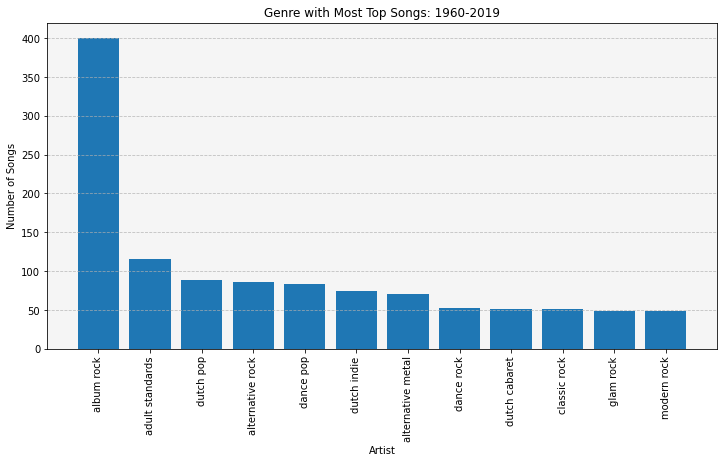

<Figure size 432x288 with 0 Axes>

In [12]:
# Finding the top 12 genres between 1960 and 2019
spotify_top_genre = spotify.groupby('genre').size()
spotify_top_genre = spotify_top_genre.sort_values(ascending = False)
spotify_top_genre = spotify_top_genre[:12]

top10_genres = ['album rock', 'adult standards', 'dutch pop', 'alternative rock',
       'dance pop', 'dutch indie', 'alternative metal', 'dance rock',
       'dutch cabaret', 'classic rock', 'glam rock', 'modern rock']

# Plotting the top genres in a bar chart
plt.figure(figsize=(12,6))
plt.bar(spotify_top_genre.index, spotify_top_genre)
plt.title('Genre with Most Top Songs: 1960-2019')
plt.ylabel('Number of Songs')
plt.xlabel('Artist')
ax = plt.subplot()
ax.set_xticklabels(labels = top10_genres, rotation = 90)
ax.grid(zorder=0, linestyle='dashed', axis='y', alpha=0.8)
ax.set_facecolor('whitesmoke')
plt.show()
plt.clf()

After observing the results, it seems like most of the top 12 genres are variations of pop and rock music. After looking deeper into the data, many extremely unique sub-genres can be found.

Therefore, I decided to superset the data into more general categories by grouping together similar genres. This technique will give a more accurate overview of the most popular genres and we will be able to observe how some less popular genres change with time.

In [13]:
# Grouping together similar genres into categories using 'if' and inserting the data into the 'genre_cat' column

genre_cat = []
for row in spotify.genre:
    if 'rock' in row:
        genre_cat += ['rock']
    elif 'british invasion' in row:
        genre_cat += ['rock']
    elif 'indie' in row:
        genre_cat += ['indie']
    elif 'permanent wave' in row:
        genre_cat += ['indie']
    elif 'pop' in row:
        genre_cat += ['pop']
    elif 'mellow' in row:
        genre_cat += ['pop']
    elif 'boy band' in row:
        genre_cat += ['pop']
    elif 'hip hop' in row:
        genre_cat += ['hip hop']
    elif 'rap' in row:
        genre_cat += ['hip hop']
    elif 'dance' in row:
        genre_cat += ['dance']
    elif 'big beat' in row:
        genre_cat += ['dance']
    elif 'edm' in row:
        genre_cat += ['dance']
    elif 'soul' in row:
        genre_cat += ['soul']
    elif 'metal' in row:
        genre_cat += ['metal']
    elif 'country' in row:
        genre_cat += ['country']
    elif 'folk' in row:
        genre_cat += ['folk']
    elif 'reggae' in row:
        genre_cat += ['reggae']
    elif 'elect' in row:
        genre_cat += ['electronic']
    else:
        genre_cat += [row]

spotify['genre_cat'] = genre_cat


C:\Users\Sam\AppData\Local\Temp\ipykernel_1248\1390375096.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels = top10_genres, rotation = 90)


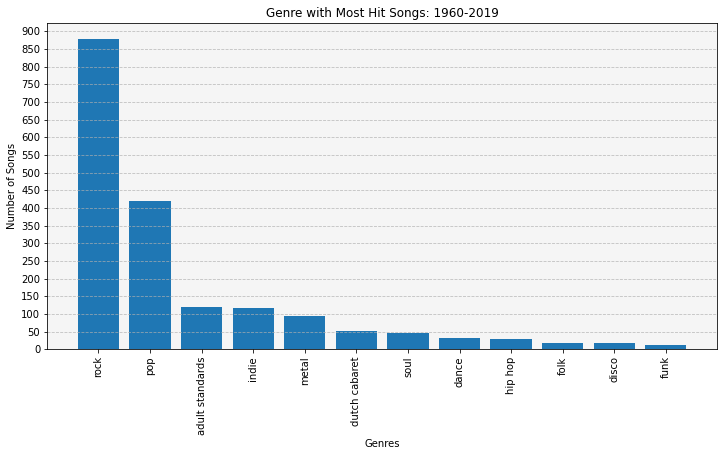

<Figure size 432x288 with 0 Axes>

In [14]:
# Finding the top 12 genres categories between 1960 and 2019 and plotting a bar chart

spotify_top_cat = spotify.groupby('genre_cat').size()
spotify_top_cat = spotify_top_cat.sort_values(ascending = False)
spotify_top_cat = spotify_top_cat[:12]

top10_genres = ['rock', 'pop', 'adult standards', 'indie', 'metal', 'dutch cabaret',
       'soul', 'dance', 'hip hop', 'folk', 'disco', 'funk']

plt.figure(figsize=(12,6))
plt.bar(spotify_top_cat.index, spotify_top_cat)
plt.title('Genre with Most Hit Songs: 1960-2019')
plt.ylabel('Number of Songs')
plt.xlabel('Genres')
ax = plt.subplot()
ax.set_xticklabels(labels = top10_genres, rotation = 90)
ax.set_yticks(range(0,901,50))
ax.grid(zorder=0, linestyle='dashed', axis='y', alpha=0.8)
ax.set_facecolor('whitesmoke')
plt.show()
plt.clf()

As shown in the results, *rock* and *pop* still top the graph, however now there is also data for smaller genres such as *soul*, *dance* and *hip-hop* amongst others.

The *adult standards* genre stands out as a strange genre name. From the Spotify website, *adult standards* is described as 'initially a North American radio generalisation' and is 'aimed towards "mature" adults, namely those who are over 50 years of age'. After looking deeper into the dataset, it seems like it is a collection of a lot of different genres such as *soul*, *folk* and *funk*. Unfortunately, the *adult standard* classification hinders the song count for these genres and we must consider this when viewing the results

Again, we can see the Dutch influence with *dutch cabaret* ranked fifth.

### Top Genres by Decade
Here, I will analyze the changing popularity of the Top 12 genres over time. It will provide infomation about how the general style of popular music has evolved.

The results have been split into 3 line graphs which contain genres with similar popularity for ease of reading.

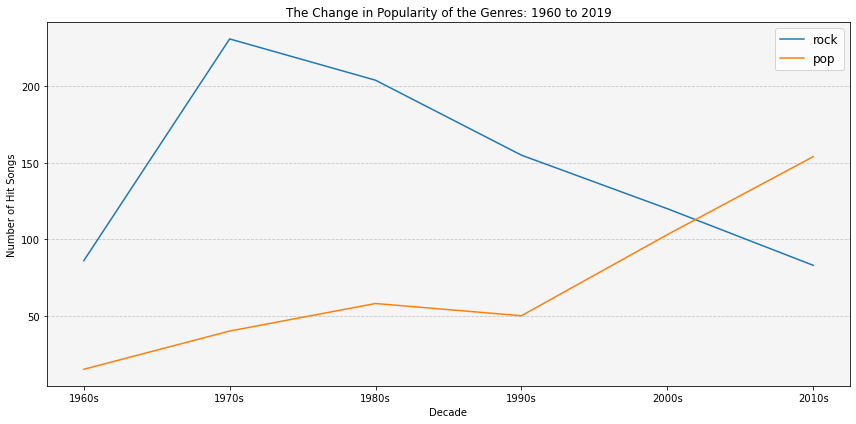

<Figure size 432x288 with 0 Axes>

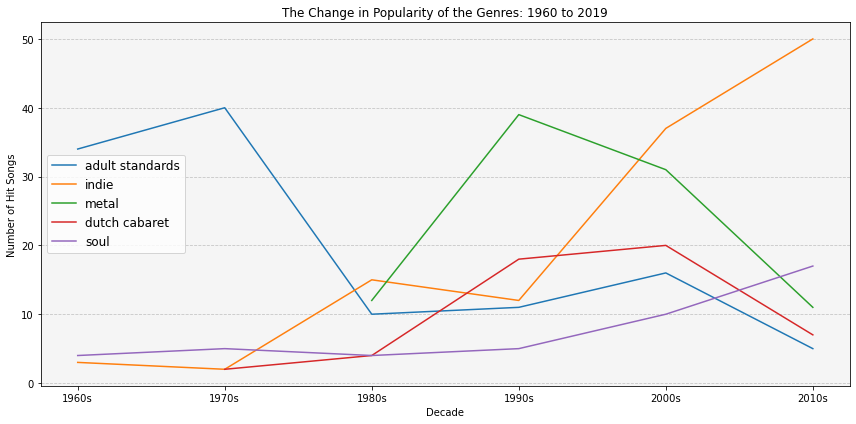

<Figure size 432x288 with 0 Axes>

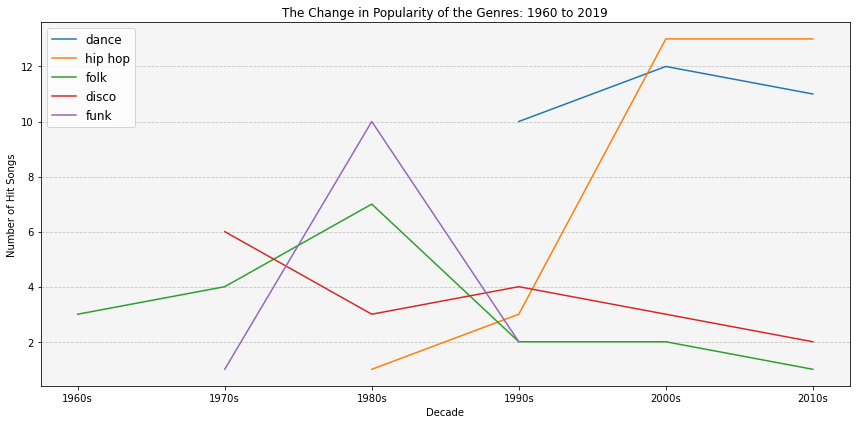

<Figure size 432x288 with 0 Axes>

In [15]:
def genre_count_by_decade_df(df, decade, labels):
    
    # Set figure and axis
    plt.figure(figsize = (12,6))
    ax = plt.subplot()
    ax.grid(zorder=0, linestyle='dashed', axis='y', alpha=0.7)
    
    # Subsets dataframe to contain only songs of specific genre and counts songs per decade
    for genre in labels:
        temp_df = df[df.genre_cat == genre]
        genre_count = (temp_df['decade_int'].value_counts(sort=False))
        genres = genre_count.index
        
        # Plots genres on same axis
        plt.plot(genres, genre_count)
    
    plt.title(f'The Change in Popularity of the Genres: 1960 to 2019')
    plt.xlabel('Decade')
    plt.ylabel('Number of Hit Songs')
    plt.legend(labels=labels, fontsize = 'large')
    ax.set_xticks(range(1965,2016,10))
    ax.set_xticklabels(['1960s', '1970s', '1980s', '1990s', '2000s', '2010s'])
    ax.set_facecolor('whitesmoke')
    plt.tight_layout()
    plt.show()
    plt.clf()

# Similar ranking genres plotted on 3 different graphs 
decades = [1965, 1975, 1985, 1995, 2005, 2015]
genre_count_by_decade_df(spotify, decades, ['rock', 'pop'])
genre_count_by_decade_df(spotify, decades, ['adult standards', 'indie', 'metal', 'dutch cabaret', 'soul'])
genre_count_by_decade_df(spotify, decades, ['dance', 'hip hop', 'folk', 'disco', 'funk'])


The results identify *rock* as being the most popular genre with its most popular decade being the 1970s. However, after this decade there has been a slow decline in its popularity with *pop* surpassing it in the 2000s. This could be due to the emergence and increase in demand for decendants of *rock* such as *indie*, which has been seeing vast improvements since the 1990s, and *metal* which was popular in the 1990s but has seen a fall off since.

*pop* became the most popular genre in the mid 2000s and seems like it will continue to gain popularity in the future. On the other hand, this might be caused by the classification of *'pop'* being anything that is popular nowadays.

*adult standards* has seen a large decrease in demand since the 1970s. However, this could be down to it's classification mentioned earlier. *soul* which made up part of the classification has been constantly gaining popularity. In addition, when *adult standard* saw its biggest decline in the 1980s, this was also the decade that *folk* and *funk* generated large numbers of hit songs.

*disco* has experience a constant drop in demand since the 1970s. The evolution of alternate 'dancy' genres may have caused this such as *funk*, and also *dance* which became popular in the 1990s, probably due to the advances in computerized music production.

*hip-hop* has seen a boom in popularity especially since the 1990s and ranked within the top 5 genres in the 2010s

### Change in Musical Characteristics over Time

The next analysis focuses on the characteristics of the songs which should provide more in depth infomation about the change in popularity of the style of popular music.

Firstly, a histogram for each of the 9 characteristics in question was plotted to observe the range and spread of values.

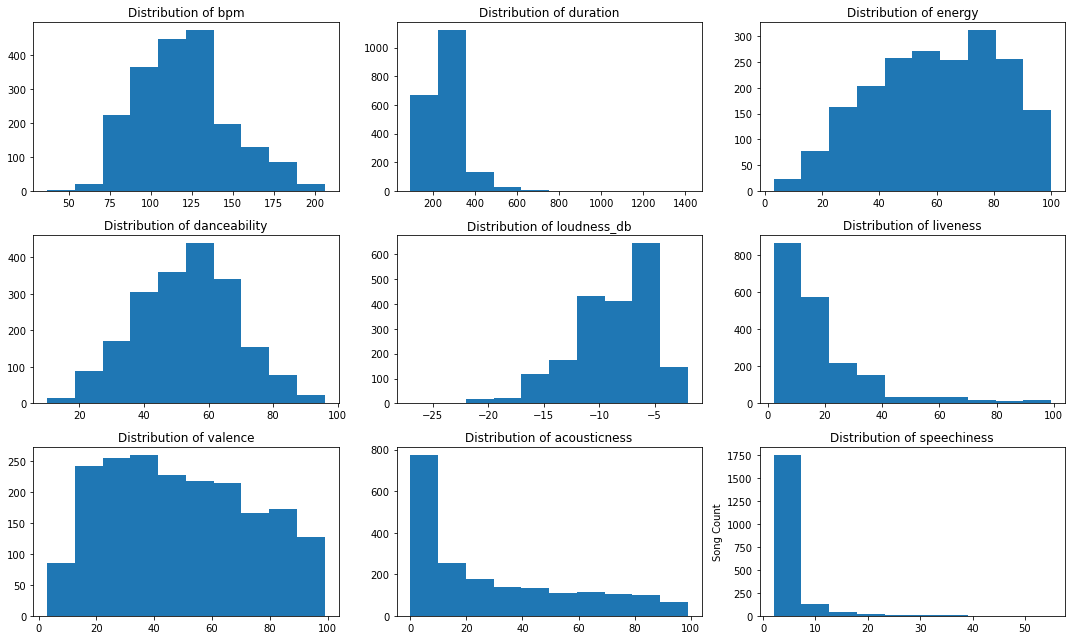

<Figure size 432x288 with 0 Axes>

In [16]:
### EDA of charcteristics ###
def histoplotter(char):
    
    # Plots histograms of all characteristics on a 3x3 subplot using 'x' and 'count'
    # to calculate correct subplot location
    fig, axs = plt.subplots(3, 3, figsize=(15,9))
    
    count = 0
    x= -1
        
    for item in char:
        if count%3 == 0:
            x+=1
        axs[x, count%3].hist(spotify[item])
        axs[x, count%3].set_title(f'Distribution of {item}')
        count += 1   

    plt.ylabel('Song Count')
    plt.tight_layout()
    plt.show()
    plt.clf()
    return
         
    
char = ['bpm', 'duration', 'energy', 'danceability', 'loudness_db', 
        'liveness', 'valence', 'acousticness', 'speechiness']

histoplotter(char)

Rather than looking at the results to find issues with the distribution, these graphs are useful in order to find the range and scale of each charcteristic.

For example, most variables are a scale of 1 to 100, generated by Spotify API. The exceptions to this being *bpm*, *duration*, *loudness* and *speechiness*.

*bpm* ranges from around 50 to 200 bpm, whereas *duration* has a much large range with the majority of songs being in between the 3 and 4 minute mark. There are a few anomalies in *duration* with several songs being longer than 1000 seconds. These will not be omited from the investigation because, although they are anomalies, they are not errors and removing them would lead to inaccurate results.

*loudness* is a measure of decibels and as such have a negative scale.

*speechiness* is actually a scale of 1 to 100, however a track with 'a value of over 66 is most likely an accapella or spoken word' song with little to no instrumental accomanpaniment. As shown in the histogram, none of the top 2000 songs on spotify fit into this category, with the maximum speechiness value being less than 40. This gives us our first insight into the style of popular music.

Next, a line graph for each characteristic was plotted. These graphs include a line for the average value per year and also the average value per decade to produce a trendline. An actual linear trendline was plotted as well.

In [17]:
# dataframe of means for each year and decade

avg_by_year = spotify.groupby(['year']).mean()

avg_by_decade = spotify.groupby(['decade_int']).mean()

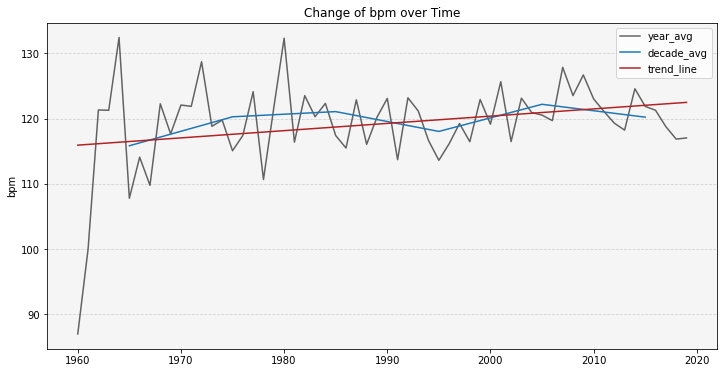

<Figure size 432x288 with 0 Axes>

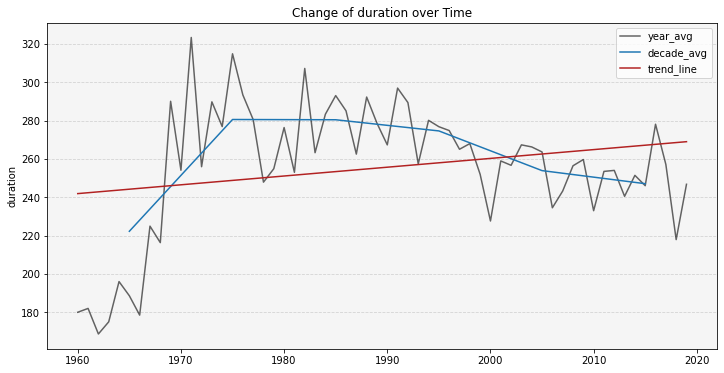

<Figure size 432x288 with 0 Axes>

In [18]:
def characteristic_graph(char):
    
    # Set x and y values for avg_by_year line graph
    x=avg_by_year.index
    y=avg_by_year
    
    # Plots avg_by_year and avg_by_decade for all characteristics
    for i in char:
        plt.figure(figsize=(12,6))
        plt.plot(x, y[i], label = 'year_avg', alpha=0.6, color='black')
        plt.plot(avg_by_decade.index, avg_by_decade[i], label = 'decade_avg')
        
        # Calculates & plots trend_line from avg_by year data
        z = np.polyfit(x, y[i], 1)
        p = np.poly1d(z)
        plt.plot(x, p(x), label='trend_line', color='firebrick')
        
        ax = plt.subplot()
        ax.set_xticks(range(1960,2021,10))
        ax.grid(zorder=0, linestyle='dashed', axis='y', alpha=0.5)
        ax.set_facecolor('whitesmoke')
        plt.title(f'Change of {i} over Time')
        plt.ylabel(i)
        plt.legend()
        plt.show()
        plt.clf()

characteristic_graph(['bpm', 'duration'])

Firstly, we will take a look at *bpm* and *duration*.

*bpm* has seen a slight increase over time but has remained close to 120 beats per minute with the 1960s and 2010s having the lowest and highest average respectively.

The *duration* of songs were longest in the 1970s and 1980s with an average of 280 seconds, however since then, it seems the more popular songs have short length of around 250 seconds. The trendline in not particularly useful in this graph as the trend follows a more parabolic rather than linear pattern.

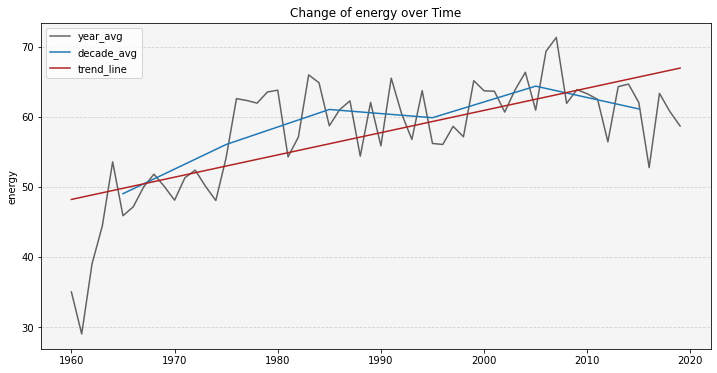

<Figure size 432x288 with 0 Axes>

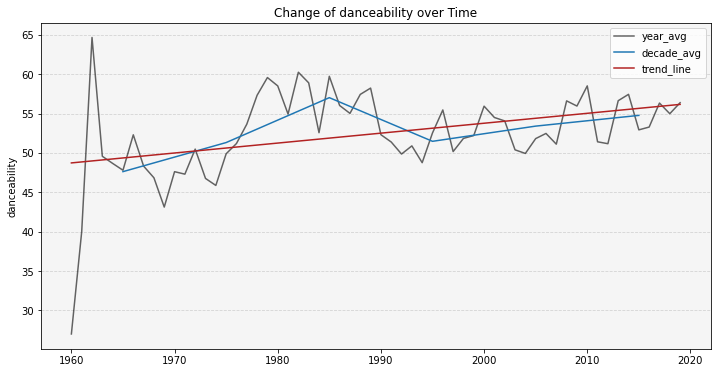

<Figure size 432x288 with 0 Axes>

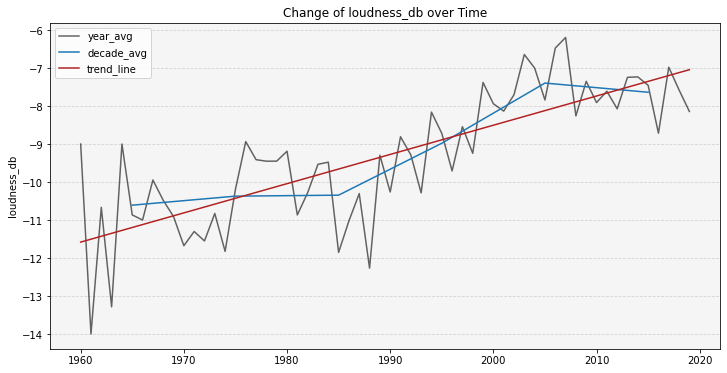

<Figure size 432x288 with 0 Axes>

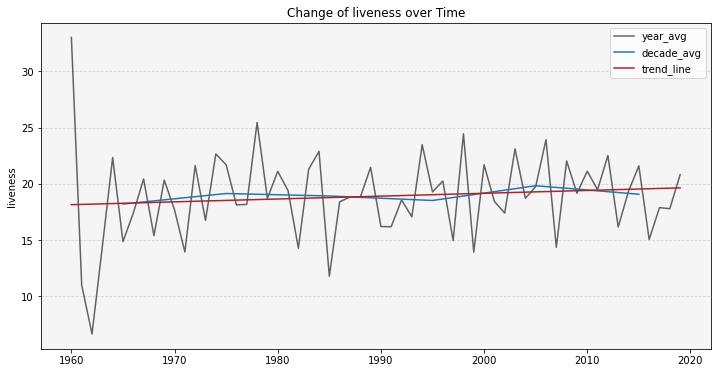

<Figure size 432x288 with 0 Axes>

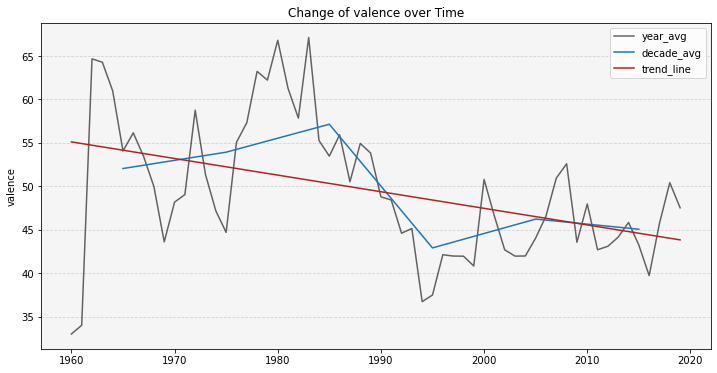

<Figure size 432x288 with 0 Axes>

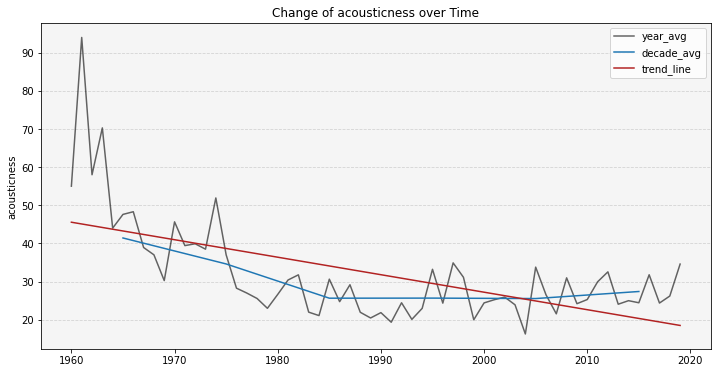

<Figure size 432x288 with 0 Axes>

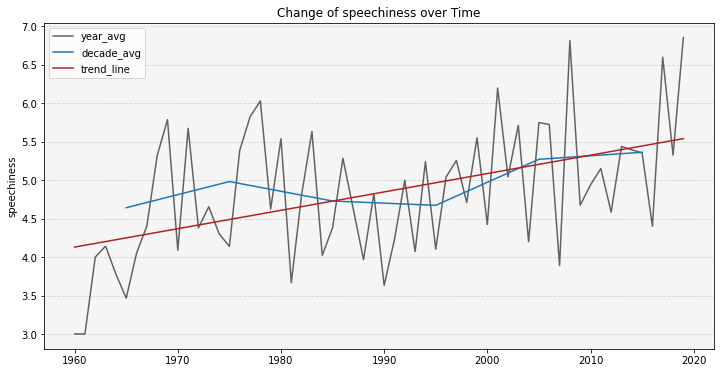

<Figure size 432x288 with 0 Axes>

In [19]:
# Same function as used above

char = ['energy', 'danceability', 'loudness_db', 'liveness', 'valence', 'acousticness', 'speechiness']
characteristic_graph(char)

Songs with high *energy* and *danceability* have become more popular in recent times. This could be due to the increased popularity of *dance* music. There was also a spike in 1980s which may have been caused by the spike in popularity of *funk*.

In addition, *speechiness* has increased as well potentially due to higher demand for *hip-hop* and *pop* rather than more instrumental genres such as *rock*.

The *loudness* of songs has also seen a vast increase. This could be down to better audio quality and production techniques meaning songs can be produced at a louder decibel without interfering with the quality. However, considering the higher *energy* and *danceability* values, paired with much lower *acousticness* values, the general population nowadays may just prefer louder songs compared to slow and soft ones.

The *valence* of popular music has experienced a large downturn, suggesting more negative songs are preferred over positive and happy ones. The largest dip occured in the 1990s when *metal* was in its prime and the valency of music has stayed relatively similar ever since. 

*liveness* has not accounted any notable change over the years.

### OBJECTIVE 3
Bonus: To compare how the style of music differs between the most popular artists and the rest

### Percentage Difference in Musical Characteristics
The average value for all musical characteristics in the top 2000 spotify dataset were found. These were then compared to the average values for only the Top 10 artists found in OBJECTIVE 1. The percentage difference between them was then calculated. The results are displayed below in table and bar chart form.

,0,characters,spotify_avg,top10_avg,perc_difference
7,7,acousticness,28.76,26.33,-8.45
8,8,speechiness,5.00,4.58,-8.40
1,1,duration,262.88,253.20,-3.68
4,4,loudness_db,-8.99,-8.79,-2.22
0,0,bpm,120.09,119.02,-0.89
3,3,danceability,53.18,54.22,1.96
2,2,energy,59.73,61.78,3.43
5,5,liveness,19.05,20.01,5.04
6,6,valence,49.14,52.62,7.08


C:\Users\Sam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


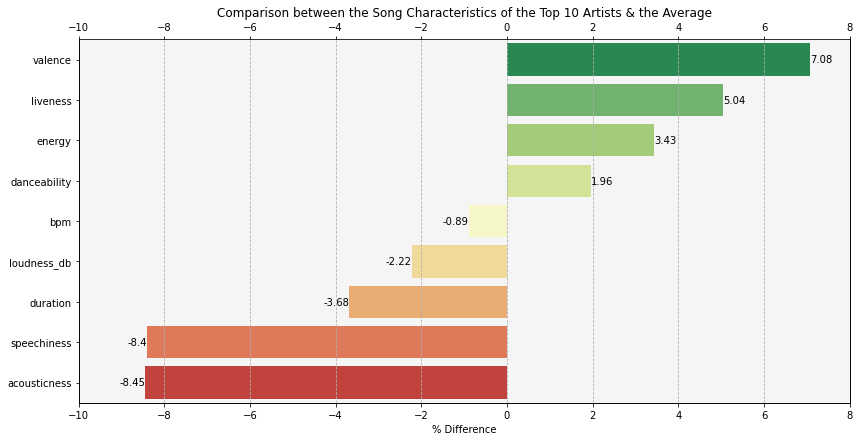

<Figure size 432x288 with 0 Axes>

In [20]:
columns = ['bpm', 'duration', 'energy', 'danceability', 'loudness_db', 'liveness', 'valence',
       'acousticness', 'speechiness']

# Finds average values for characteristics of all songs and appends to 'avg' list
avg_spotify = spotify[columns].mean()
avg = []
for index, value in avg_spotify.items():
    avg.append(round(value,2))

# Finds average values for characteristics of top 10 artists songs and appends to 'top10' list
avg_top10 = top10_df[columns].mean()
top10 = []
for index, value in avg_top10.items():
    top10.append(round(value,2))

# Calculates percentage difference between avg and top10 and appends to percent_diff list
percent_diff = []
percent_diff_str = []
for i in range(len(avg)):
    diff = ((top10[i] / avg[i]) * 100) - 100
    percent_diff.append(round(diff,2))
    percent_diff_str.append(str(round(diff,2)))


# Dataframe created using 3 lists mentioned above
comparison_df = pd.DataFrame(range(len(columns)))
comparison_df['characters'] = columns
comparison_df['spotify_avg'] = avg
comparison_df['top10_avg'] = top10
comparison_df['perc_difference'] = percent_diff

comparison_df = comparison_df.sort_values('perc_difference')

display(comparison_df)


# Plots barplot of percentage difference
width = 0.5
a,b = -10,8

plt.figure(figsize=(12,6))

ax = sns.barplot(comparison_df.perc_difference, comparison_df.characters, palette='RdYlGn')
plt.title('Comparison between the Song Characteristics of the Top 10 Artists & the Average')
plt.xlabel('% Difference')
plt.ylabel('')
plt.tight_layout()

ax.bar_label(ax.containers[0])
ax.grid(zorder=0, linestyle='dashed', axis='x')
ax.set_xlim(a,b)
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position("top")
ax.set_facecolor('whitesmoke')
ax.invert_yaxis()

ax2 = ax.twiny()
ax2.set_xlim(a,b)

plt.show()
plt.clf()

The results suggest that, even though valency is dropping over the years, the public repond best to positive music and to be a extremely popular artist, your music must have high *valence*. This is illustrated by a staggering percentage difference of **7.08%**.

Paired with this, the top artists also incorporate a level of *energy* and *dancability* into their music, adding to the positive vibe. Artists who also record their music live tend to do better as well suggesting people prefer a more genuine sound.

The *bpm* shows a negligible difference, however the percentage difference of **-3.68%** for *duration* suggests that artists who write shorter songs will be more popular.

Although *speechiness* is becoming more popular over time, the most sucessful artists still write songs with large instrumental parts with the difference being **-8.4%**. This difference may slowly diminish in the future. On the other hand, these instrumentals are hardly ever in an acoustic style as *acousticness* produced the highest percentage difference of **-8.45%**.


## 3. Project Conclusions

This dataset has provide several useful insights into the evolution of popular music over the last six decades.

### OBJECTIVE 1

It can be observed that the most successful artists are able to produce music whose popularity spans a few decades. Either their style has a longevity, or they have the ability to adapt their sound to comply with changing popular music.

In recent decades, popular music has definitely experienced a multicultural development, with a boost in non-english speaking acts and also lyrics. This can potenitally be accounted for by the availability of worldwide platforms to share music.

There has also been a slight expanision in female only acts, however, male artists still make up for a large proportion.

### OBJECTIVE 2

We observed how both genres and audio characteristics varied. The largest downturn was expereince by the *rock* genre as demand for 'spin-off' genres such as *indie* and *metal* began to escalate. At the same time, *pop* music overtook *rock* as the favoured genre.

There was also a clear evolution in dancy music which transition from *disco* to *funk* to *dance* with peaks and troughs for each. This progression may be accounted to an increase in computerized audio production seen in recent decades, as the *dance* genre relies heavily on this. This style of music may become increasingly fashionable in the future, with the general trend of popular music tending towards a higher *bpm*, higher *energy* and greater *danceability*.

On the other hand, this general trend is negatively affecting acoustic based styles and genre such as *folk* and parts of the *adult standards* classification. There has been a slight upturn in *acousticness* in the 2010s, but nowhere near enough to reverse its decline.

There has been a rise in *speechiness* with popular opinion shying away from heavily based instrumental tracks. This may be another reason for the downfall of classical *rock*, but it has also paved the way for styles similar to *hip-hop*.

A steady improvement of *loudness* every decade may give praise to the advancements of computerized audio techniques used in music production which allow artists to create higher decibel songs without the trade off of poorer music quality. Instead, this could just be following the general trend of faster, dancier and more energetic modern music.

Finally, there has been a significant drop in *valence* or 'positivity in popular music in the last six decades. Does this change in musical style mirror the thoughts and emotions of the general public? ... That's probably beyond the scope of this particular project!

### OBJECTIVE 3

This objective identified that *valence*, *liveness*, *energy* and *danceability* are the combined variables which give top artists long, several decade spanning success.

On the other hand, *acousticness*, *speechiness* and long *duration* songs limit the artists longevity and the successfulness of these characteristics may be based around the popularity and trends of the certain era when the song was released.

### Future Work
A large critisim of this dataset is that it is only taken from one music platform, Spotify. Therefore the results are largely based on the listening habits of their particular customer demographic. To diversify the dataset, it may be useful to incorporate more data from different sources to reduce the Spotify bias.

It may also be useful to include more/different measures of 'popularity' into the investigation such as records sold, total listeners ect, however this may favour more recent artists as they are able to reach a larger worldwide audience nowadays.

It would be interesting to analyse older trends in music released in decades pre 1960. Although, the collection of large amounts of accurate and complete data will be chalenging.

In OBJECTIVE 3, a greater comparison would be between this Top 2000 Spotify Dataset and a large, randomly selected sample of Spotify songs to determine what characteristics make a song 'popular'.

